# Assignment: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [3]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/csv/ibtracs.ALL.list.v04r01.csv'	

df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [4]:
len(df)

715369

How many North Atlantic hurricanes are in this dataset?

In [5]:
NA = df[df.BASIN == 'NA']
len(NA)

126399

### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [6]:
df['BASIN'].unique()

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [7]:
df['SUBBASIN'].unique()

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [8]:
df['NATURE'].unique()

array(['NR', 'TS', 'ET', 'MX', 'SS', 'DS'], dtype=object)

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [9]:
rename = df.rename (columns = {'WMO_WIND':'WIND', 'WMO_PRES':'PRES'})
rename

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715364,2024297N17089,2024,76,NI,BB,DANA,2024-10-23 12:00:00,NR,17.3,89.0,NaN,NaN
715365,2024297N17089,2024,76,NI,BB,DANA,2024-10-23 15:00:00,NR,17.7,88.8,NaN,NaN
715366,2024297N17089,2024,76,NI,BB,DANA,2024-10-23 18:00:00,NR,18.1,88.7,NaN,NaN
715367,2024297N17089,2024,76,NI,BB,DANA,2024-10-23 21:00:00,NR,18.5,88.6,NaN,NaN


### 3) Get the 10 largest rows in the dataset by `WIND`

In [10]:
top10wind = rename.nlargest(10, columns = 'WIND', keep = 'all')
top10wind.head(10)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
659500,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
659498,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
659502,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
421314,1980214N11330,1980,55,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
175297,1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
175298,1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
175300,1935241N23291,1935,45,NA,GM,UNNAMED,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
475876,1988253N12306,1988,73,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
545771,1997253N12255,1997,75,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
599105,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [11]:
gb = rename.groupby('SID')
gb_top10wind = gb.aggregate(np.max).nlargest(10, columns = 'WIND', keep = 'all')
gb_top10wind.head(10)

/tmp/ipykernel_913/2683677032.py:2: FutureWarning: The provided callable <function max at 0x7954a8330180> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  gb_top10wind = gb.aggregate(np.max).nlargest(10, columns = 'WIND', keep = 'all')


,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
SID,,,,,,,,,,,
2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-24 12:00:00,TS,23.2,-94.0,185.0,1007.0
1980214N11330,1980,55,NA,NA,ALLEN,1980-08-11 18:00:00,TS,28.9,-30.0,165.0,1010.0
1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-10 12:00:00,TS,57.0,-31.1,160.0,996.0
1988253N12306,1988,73,NA,NA,GILBERT,1988-09-20 00:00:00,TS,43.4,-54.0,160.0,1008.0
1997253N12255,1997,75,EP,MM,LINDA,1997-09-17 18:00:00,TS,23.5,-104.7,160.0,1007.0
2005289N18282,2005,97,NA,NA,WILMA,2005-10-26 18:00:00,TS,45.5,-52.0,160.0,1004.0
2019236N10314,2019,53,NA,NA,DORIAN,2019-09-09 00:00:00,TS,51.6,-46.4,160.0,1011.0
1998295N12284,1998,88,NA,NA,MITCH,1998-11-09 18:00:00,TS,63.5,-5.0,155.0,1005.0
2005261N21290,2005,80,NA,NA,RITA,2005-09-26 06:00:00,TS,39.5,-69.9,155.0,1009.0


### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

/tmp/ipykernel_913/947722695.py:1: FutureWarning: The provided callable <function max at 0x7954a8330180> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  gb.aggregate(np.max).nlargest(20, columns = 'WIND').plot(x = 'NAME', kind='bar', y = 'WIND', legend = False, figsize = (12,6))


Text(0, 0.5, 'Wind Speed')

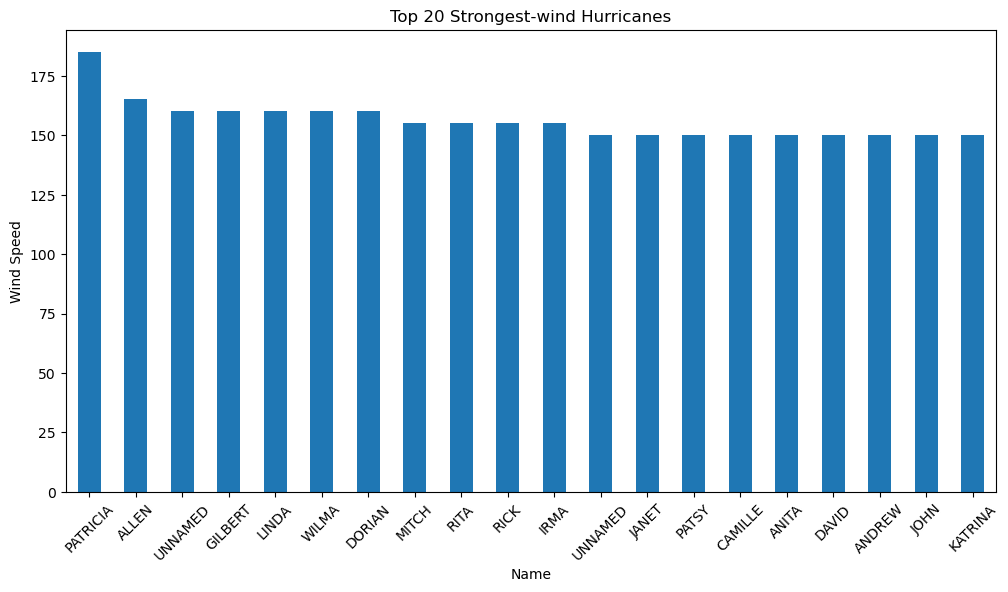

In [12]:

gb.aggregate(np.max).nlargest(20, columns = 'WIND').plot(x = 'NAME', kind='bar', y = 'WIND', legend = False, figsize = (12,6))

plt.xticks(rotation=45)
plt.title('Top 20 Strongest-wind Hurricanes')
plt.xlabel('Name')
plt.ylabel('Wind Speed')

### 6) Plot the count of all datapoints by Basin

as a bar chart

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'EP'),
  Text(1, 0, 'NA'),
  Text(2, 0, 'NI'),
  Text(3, 0, 'SA'),
  Text(4, 0, 'SI'),
  Text(5, 0, 'SP'),
  Text(6, 0, 'WP')])

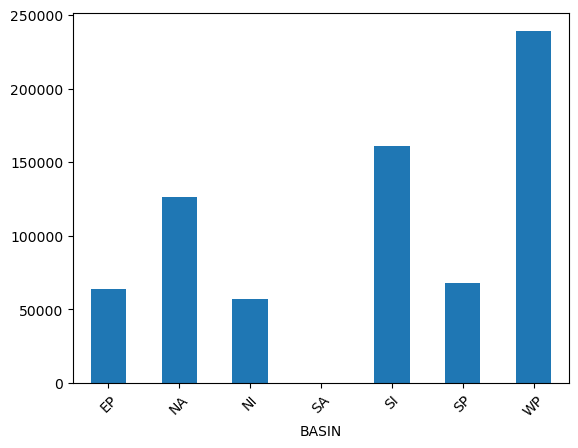

In [13]:
basin = rename.groupby('BASIN')
basin.NAME.count().plot(kind = 'bar')

plt.xticks(rotation=45)

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'EP'),
  Text(1, 0, 'NA'),
  Text(2, 0, 'NI'),
  Text(3, 0, 'SA'),
  Text(4, 0, 'SI'),
  Text(5, 0, 'SP'),
  Text(6, 0, 'WP')])

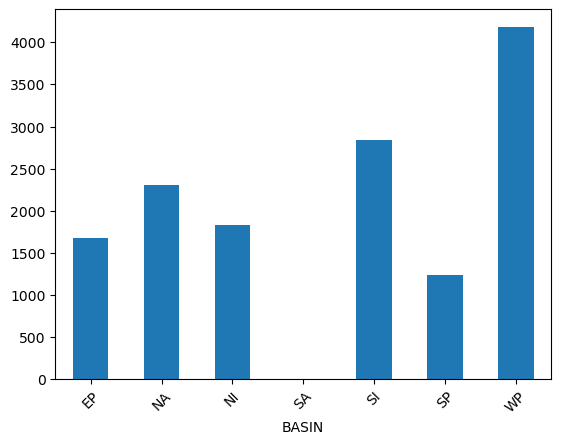

In [14]:
basin = rename.groupby('BASIN')
basin['SID'].nunique().plot(kind = 'bar')

plt.xticks(rotation=45)

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

Text(0, 0.5, 'Latitude')

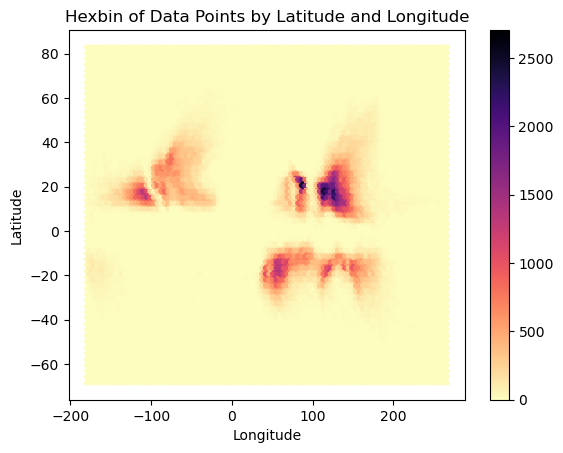

In [15]:
plt.hexbin(df['LON'], df['LAT'], cmap='magma_r')
plt.colorbar()

plt.title('Hexbin of Data Points by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [16]:
Katrina = rename[(rename['NAME'] == 'KATRINA') & (rename['SEASON'] == 2005)]
Katrina.head(10)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
597104,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 18:00:00,TS,23.1,-75.1,30.0,1008.0
597105,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 21:00:00,TS,23.2,-75.4,NaN,NaN
597106,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 00:00:00,TS,23.4,-75.7,30.0,1007.0
597107,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 03:00:00,TS,23.6,-76.0,NaN,NaN
597108,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 06:00:00,TS,23.8,-76.2,30.0,1007.0
597109,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 09:00:00,TS,24.1,-76.4,NaN,NaN
597110,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 12:00:00,TS,24.5,-76.5,35.0,1006.0
597111,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 15:00:00,TS,25.0,-76.7,NaN,NaN
597112,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 18:00:00,TS,25.4,-76.9,40.0,1003.0
597113,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 21:00:00,TS,25.8,-77.3,NaN,NaN


Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

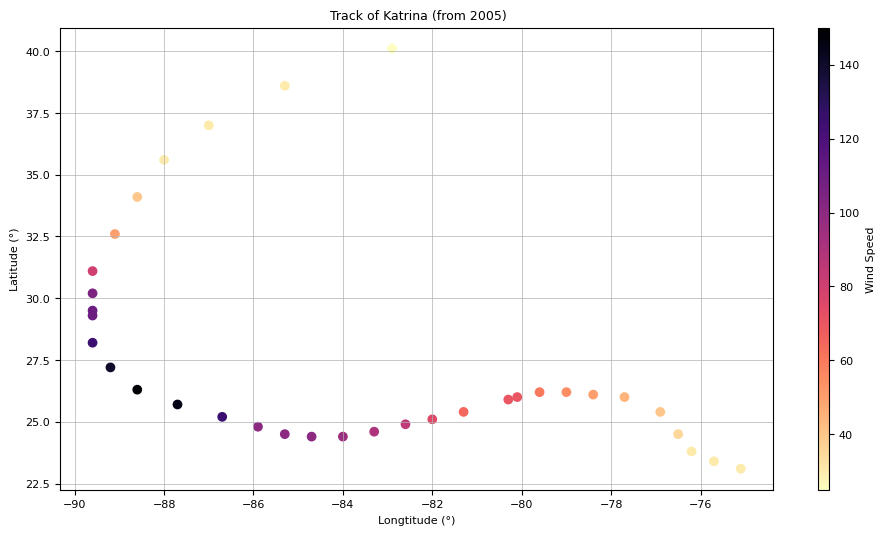

In [17]:
fig, ax = plt.subplots(figsize = (11.5,6))

splot = ax.scatter(Katrina['LON'], Katrina['LAT'], c = Katrina['WIND'], cmap='magma_r' )
cbar = fig.colorbar(splot,aspect=40)
cbar.set_label('Wind Speed', fontsize=8)
cbar.ax.tick_params (labelsize=8)
ax.set_title(' Track of Katrina (from 2005)', fontsize=9)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=8)
ax.set_ylabel('Latitude (°)', fontsize=8)
ax.set_xlabel('Longtitude (°)', fontsize=8)
ax.grid(which='major', linewidth=0.5)

### 10) Make time the index on your dataframe

In [18]:
df.set_index('ISO_TIME', inplace=True)
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,UNNAMED,NR,10.9,80.3,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,UNNAMED,NR,10.9,79.8,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,UNNAMED,NR,10.8,79.4,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,UNNAMED,NR,10.8,78.9,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,UNNAMED,NR,10.8,78.4,NaN,NaN


### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

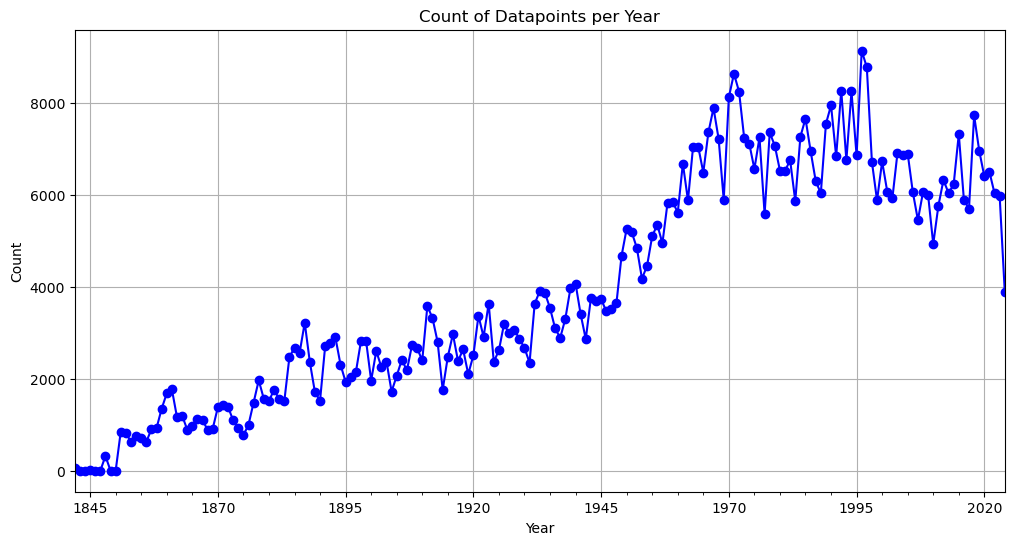

In [36]:
yearly_counts = df.resample('YE').size()
plt.figure(figsize=(12, 6))

yearly_counts.plot(marker='o', c = 'blue')
plt.title('Count of Datapoints per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

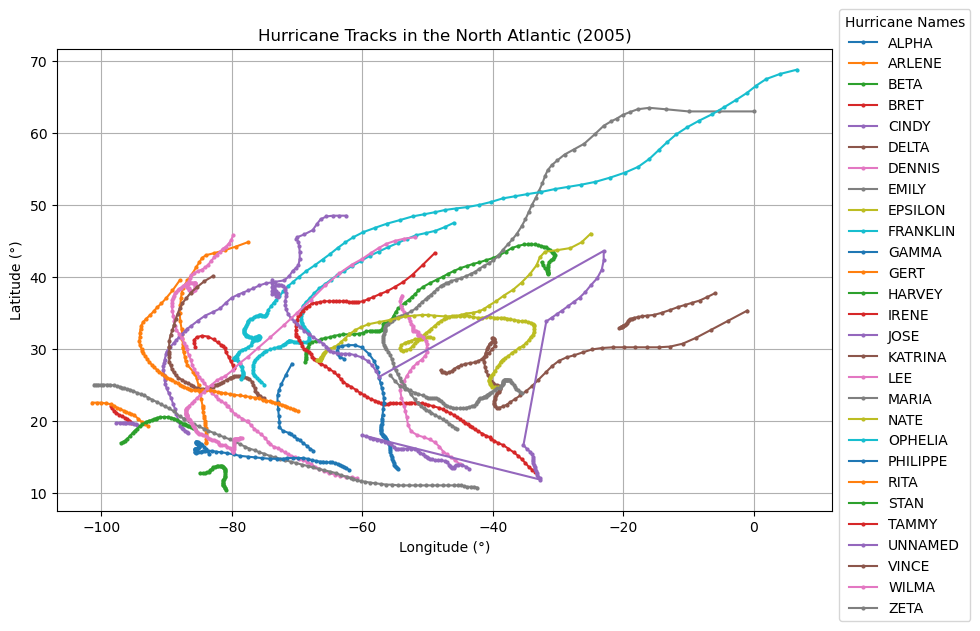

In [20]:
NA = df[(df['SEASON'] == 2005) & (df['BASIN'] == 'NA')]
NANAME = NA.groupby('NAME')

plt.figure(figsize=(10, 6))
for i,j in NANAME:
    plt.plot(j['LON'], j['LAT'], marker='o', markersize=2, label=i)


plt.title('Hurricane Tracks in the North Atlantic (2005)')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.grid()
plt.legend(title='Hurricane Names', bbox_to_anchor=(1, 1.1))

### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [21]:
filtered = df[(df['SEASON'] >= 1970) & (df['BASIN'] == 'NA')]
filtered.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,35,NA,CS,ALMA,TS,11.5,-79.0,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,35,NA,CS,ALMA,TS,11.6,-79.1,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,35,NA,CS,ALMA,TS,11.8,-79.3,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,35,NA,CS,ALMA,TS,12.0,-79.5,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,35,NA,CS,ALMA,TS,12.1,-79.7,25.0,NaN


### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

Text(0, 0.5, 'Number of Data Points')

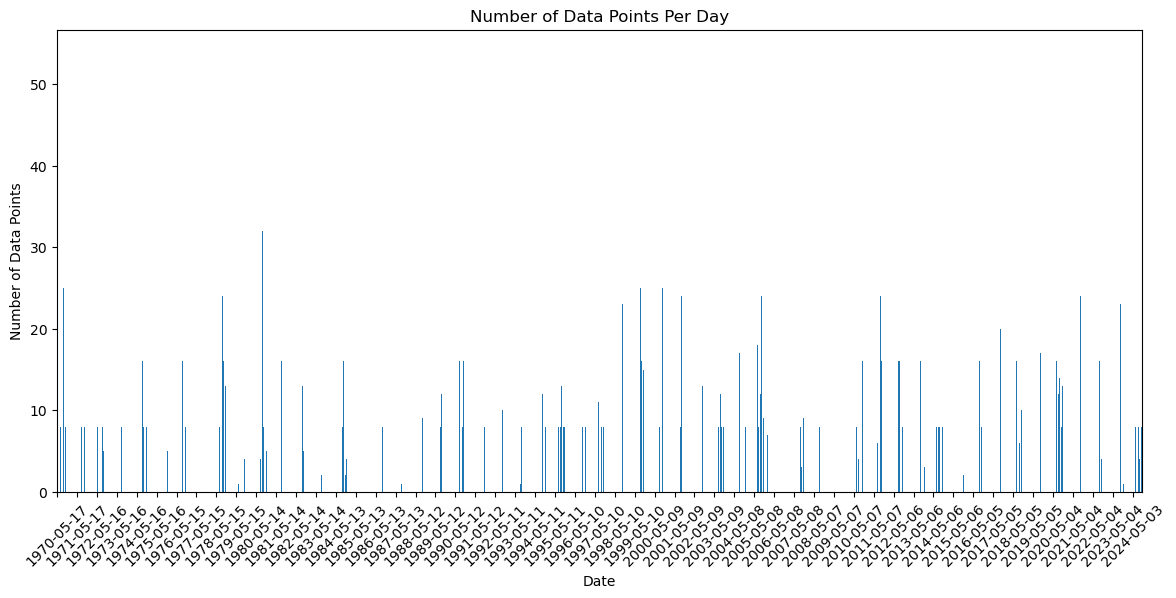

In [22]:
daily_counts = filtered.resample('D').size()

plt.figure(figsize=(14, 6))
daily_counts.plot(kind='bar')

tick_positions = range(0, len(daily_counts), 365)
tick_labels = daily_counts.index[::365].strftime('%Y-%m-%d')
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.title('Number of Data Points Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')


In [23]:
"""daily_counts = filtered.resample('D').size()
daily_counts.head(None)"""

"daily_counts = filtered.resample('D').size()\ndaily_counts.head(None)"

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

/tmp/ipykernel_913/3980433684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['counts'] = filtered.resample('D').size()


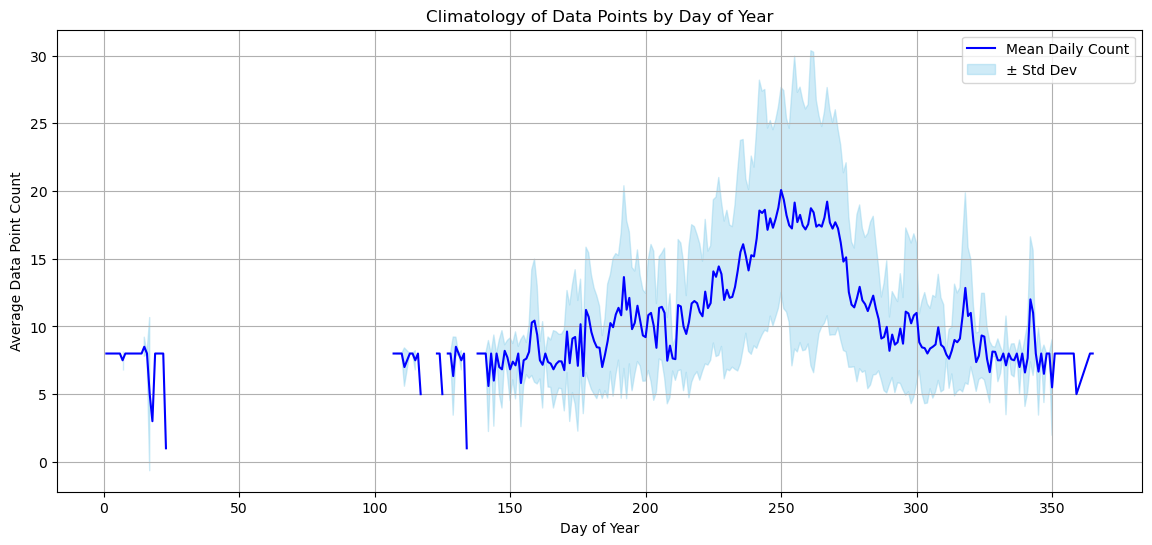

In [29]:
filtered['counts'] = filtered.resample('D').size()
filtered.loc[:, 'dayofyear'] = filtered.index.dayofyear

daily_counts = filtered.groupby('dayofyear').size()

daily_mean = filtered.groupby('dayofyear')['counts'].mean()
daily_std = filtered.groupby('dayofyear')['counts'].std()

plt.figure(figsize=(14, 6))
plt.plot(daily_mean.index, daily_mean, label='Mean Daily Count', color='blue')

plt.fill_between(daily_mean.index, 
                 daily_mean - (daily_std ), 
                 daily_mean + (daily_std ), 
                 color='skyblue', alpha=0.4, label='± Std Dev')

plt.title('Climatology of Data Points by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Average Data Point Count')
plt.legend()
plt.grid()

In [32]:
#filtered['counts'] = filtered.resample('D').size()
#filtered.head(11)
"""
daily_mean = filtered.groupby('dayofyear')['counts'].mean()
daily_std = filtered.groupby('dayofyear')['counts'].std()
daily_std.head(120)"""

"\ndaily_mean = filtered.groupby('dayofyear')['counts'].mean()\ndaily_std = filtered.groupby('dayofyear')['counts'].std()\ndaily_std.head(120)"

### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

/tmp/ipykernel_913/2427286245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['anomaly'] = filtered['counts'] - climatology
/tmp/ipykernel_913/2427286245.py:5: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_anomaly = filtered['anomaly'].resample('A').mean()


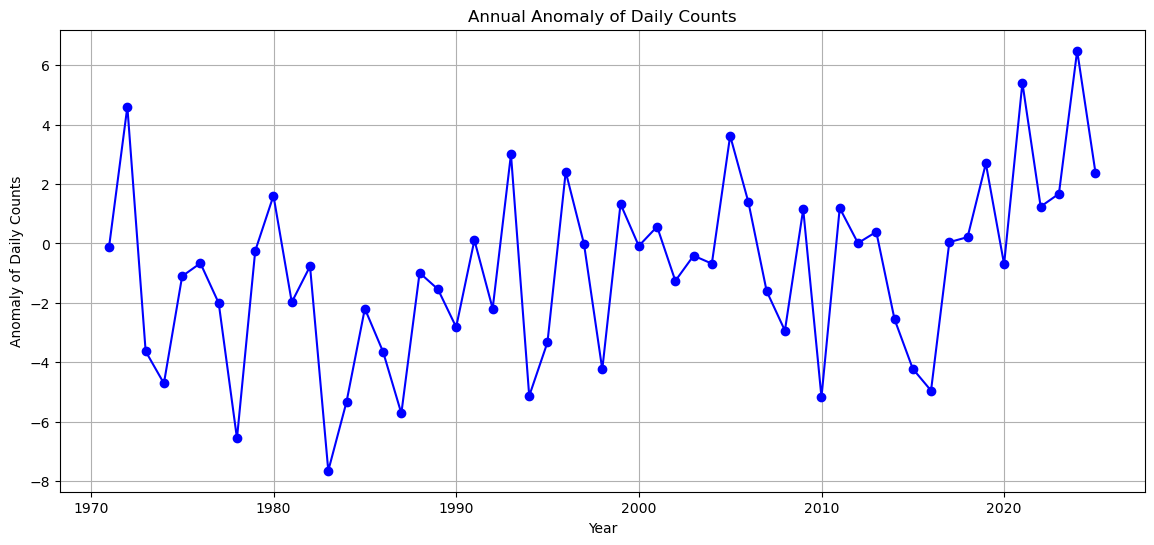

In [33]:
climatology = filtered.groupby('dayofyear')['counts'].transform('mean')

filtered['anomaly'] = filtered['counts'] - climatology

annual_anomaly = filtered['anomaly'].resample('A').mean()

plt.figure(figsize=(14, 6))
plt.plot(annual_anomaly.index, annual_anomaly, marker='o',  color='blue')
plt.title('Annual Anomaly of Daily Counts')
plt.xlabel('Year')
plt.ylabel('Anomaly of Daily Counts')
plt.grid()

Which years stand out as having anomalous hurricane activity?

In [35]:
anomaly = annual_anomaly.abs() > 6

years = anomaly[anomaly].index.year

print(years)

Index([1977, 1982, 2023], dtype='int32', name='ISO_TIME')
